In [2]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import os 
from models.unet import UNet

In [3]:
os.listdir('trained_model')

['unet_best_2.pt',
 'unet_best_3.pt',
 'unet_best_1.pt',
 'unet_best_4.pt',
 'unet_best_0.pt',
 'unet_best_5.pt']

In [4]:
results = torch.load('trained_model/unet_best_2.pt')

In [5]:
model = UNet(n_class = 1)
model.load_state_dict(results['model_state_dict'])
#model = nn.Sequential(model, nn.Sigmoid())
#model.eval()
#model.float();
model.cuda()

UNet(
  (dconv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (dconv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (dconv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (dconv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=2, stride=2, 

In [ ]:
torch.cuda.empty_cache()

In [6]:
# example images 
import albumentations
import matplotlib.pyplot as plt
import cv2 
import numpy as np 

image = cv2.imread('data_processed/images/{}'.format(np.random.choice(os.listdir('data_processed/images'))))
#image = transform(image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [7]:
transform = albumentations.Compose([albumentations.LongestMaxSize(max_size=768, p=1), 
                          albumentations.Normalize(p=1)], p=1)

#image, pads = pad(image, factor=768)

image = transform(image=image)["image"]
image = np.moveaxis(image, -1, 0)

In [8]:
#output = model(torch.from_numpy(image).unsqueeze(0).float().cuda())

In [ ]:
#_image= output.squeeze(0)

In [9]:
import albumentations 
import cv2
from src.dataset import MidvDataset
from pathlib import Path 
import torch
from torch.utils.data import DataLoader 
from torch.optim import Adam 
import matplotlib.pyplot as plt

In [10]:
list_images = sorted(list(Path('data_processed/images').rglob('*.jpg')))
list_masks = sorted(list(Path('data_processed/labels').rglob('*.png')))
list_images = [str(el) for el in list_images]
list_masks = [str(el) for el in list_masks]

samples = list(zip(list_images, list_masks))
samples = [tuple(el) for el in samples]

In [11]:
dataset = MidvDataset(samples = samples, transform = albumentations.Compose( [albumentations.LongestMaxSize(max_size= 768 , p=1)], p=1  ))
train_dt, test_dt = torch.utils.data.random_split(dataset,[ int(0.8* len(dataset)), int(0.2* len(dataset))])
train_loader = DataLoader(train_dt,  batch_size = 4, shuffle = True, num_workers = 0)
test_loader = DataLoader(test_dt, shuffle = True, batch_size = 4)

In [16]:
res = next(iter(train_loader))

In [20]:
out = model(res['features'].float().cuda() )
#mask = res['masks'].float().cuda()

RuntimeError: CUDA out of memory. Tried to allocate 324.00 MiB (GPU 0; 5.93 GiB total capacity; 5.18 GiB already allocated; 11.50 MiB free; 5.45 GiB reserved in total by PyTorch)

In [21]:
out_numpy = out.squeeze(0)[0][0].cpu().detach().numpy()
#_mask = mask.squeeze(0)[0][0].cpu().detach().numpy()

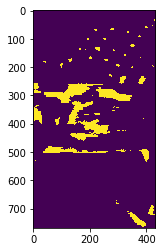

In [22]:
plt.imshow((out_numpy > 0.5))

In [23]:
plt.imshow(_mask)

NameError: name '_mask' is not defined

In [ ]:
transformed = transform(image = example_image, mask = example_mask)

In [ ]:
from pytorch_toolbelt.utils.torch_utils import tensor_from_rgb_image

In [ ]:
model(tensor_from_rgb_image(transformed['image']))

In [ ]:
import numpy as np 

In [ ]:
mask = (transformed['mask'] > 0).astype(np.uint8)

In [ ]:
np.unique(mask)

In [ ]:
mask = torch.from_numpy(mask)

In [ ]:
transform = albumentations.Compose([albumentations.LongestMaxSize(max_size=512, p=1), 
                          albumentations.Normalize(p=1)], p=1)

In [ ]:
image.shape

In [ ]:
plt.imshow(torch.from_numpy(mask).unsqueeze(0).numpy()[0, :, :])

In [ ]:
### Check for masks lack of information 

In [ ]:
model = model.cuda()
criterion = JaccardLoss(mode="binary", from_logits=True)

for epoch in range(num_epochs):
    model.train()
    for i, res in enumerate(train_loader, 0):
        inputs = res['features'].float().cuda()
        labels = res['masks'].long().cuda()
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
